# Project Description

# Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
466,60,female,28.700,1,no,southwest,13224.69300
618,19,female,33.110,0,yes,southeast,34439.85590
629,44,female,38.950,0,yes,northwest,42983.45850
1054,27,female,21.470,0,no,northwest,3353.47030
768,64,female,39.700,0,no,southwest,14319.03100
72,53,female,28.100,3,no,southwest,11741.72600
967,44,male,25.365,1,no,northwest,7518.02535
134,20,female,28.785,0,no,northeast,2457.21115
547,54,female,46.700,2,no,southwest,11538.42100
694,27,female,34.800,1,no,southwest,3577.99900


In [52]:
print(df.duplicated().sum())
df=df.drop_duplicates()

1


# Drop duplicate value 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


In [54]:
df.shape

(1337, 7)

# There are 1338 rows and 7 columns and target variable (charges) is float datatype so This is a linear regression problem

In [55]:
for i in df.columns:
    print(df[i].value_counts())

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
1    675
0    662
Name: sex, dtype: int64
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
0    1063
1     274
Name: smoker, dtype: int64
2    364
3    325
1    324
0    324
Name: region, dtype: int64
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766  

#  
Age column range is 18 to 64  between  the age 

Two types of sex ratio male and female

BMI column range is 32 to 44 between

children column this are max children cover in health insurance it means this is the family health insurance

smoker column these are maximum no of people are non smoker

region column these are 4 main location of dataset south east and west, north east and west


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#  There are no null value present in data 

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA 

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


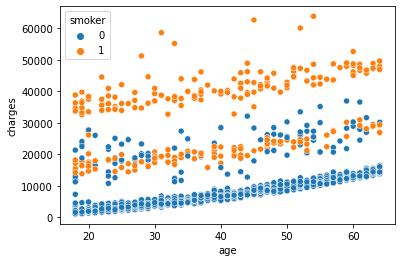

In [56]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")
plt.show()


# smoker person is paying to high charges 
non smoker person is age is rising the chrges also slightly rising

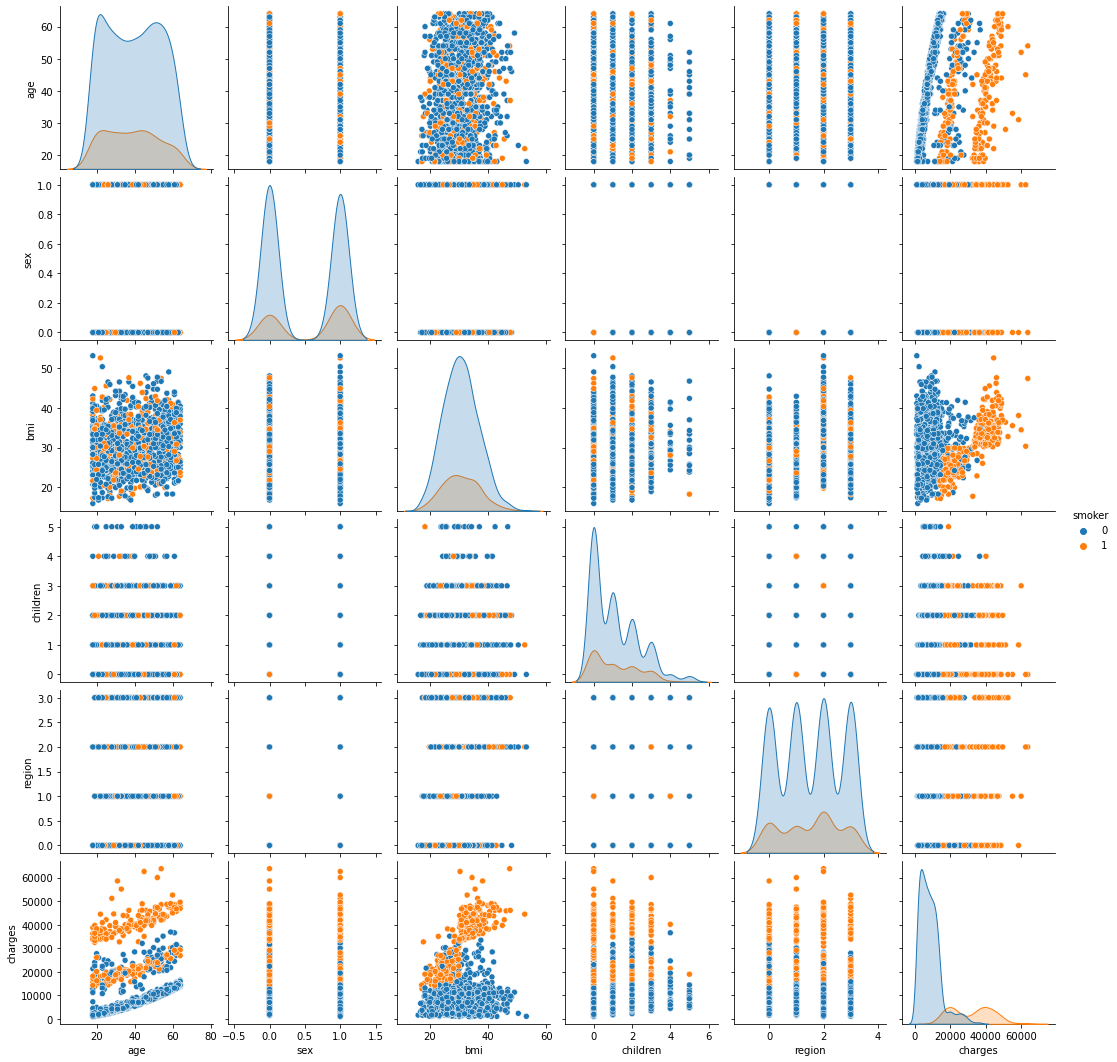

In [57]:
sns.pairplot(df, hue="smoker")

#  The smokers is less as compared to non smokers but the high charges is paying smoker


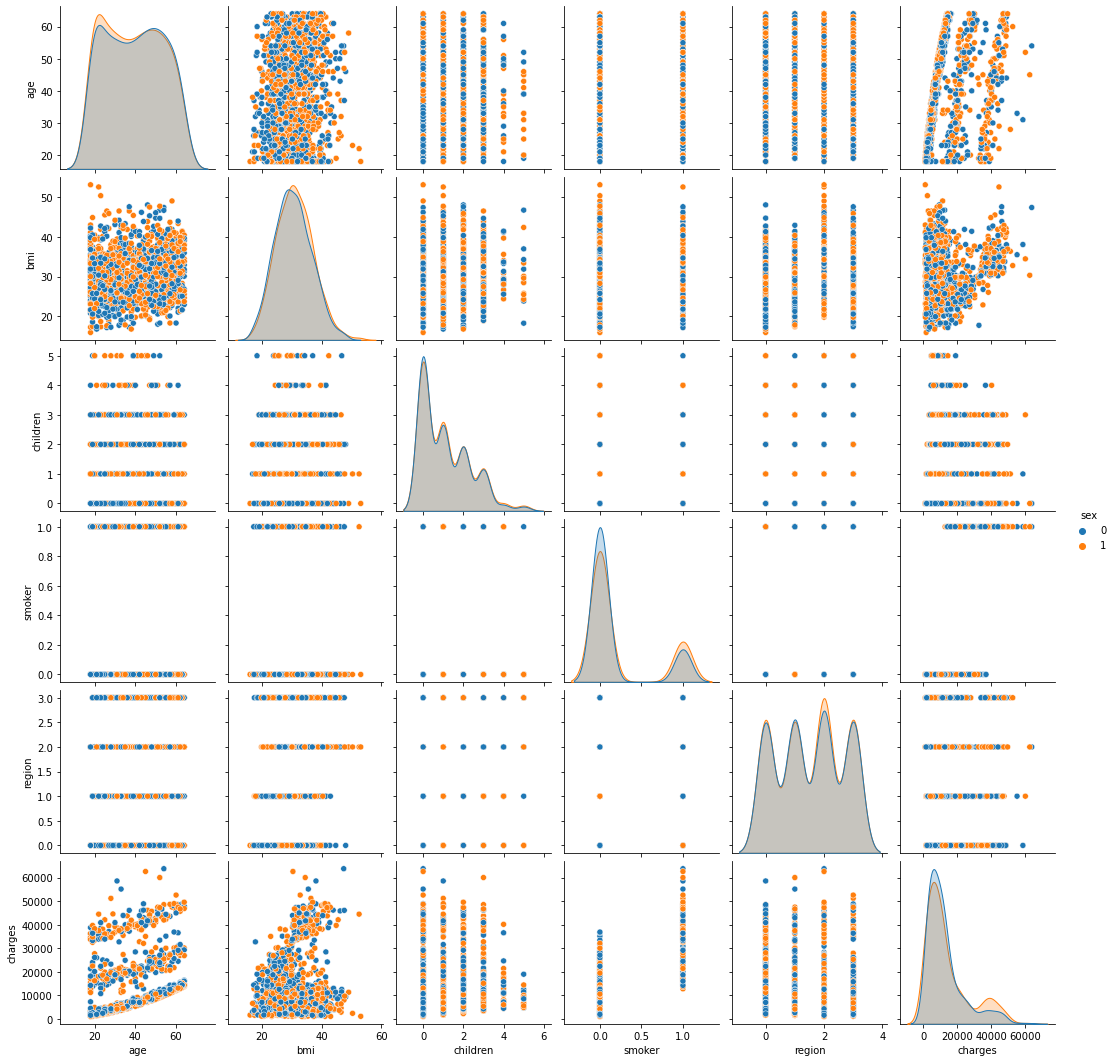

In [58]:
sns.pairplot(df, hue="sex")

#  These are equal sex ratio in this dataset

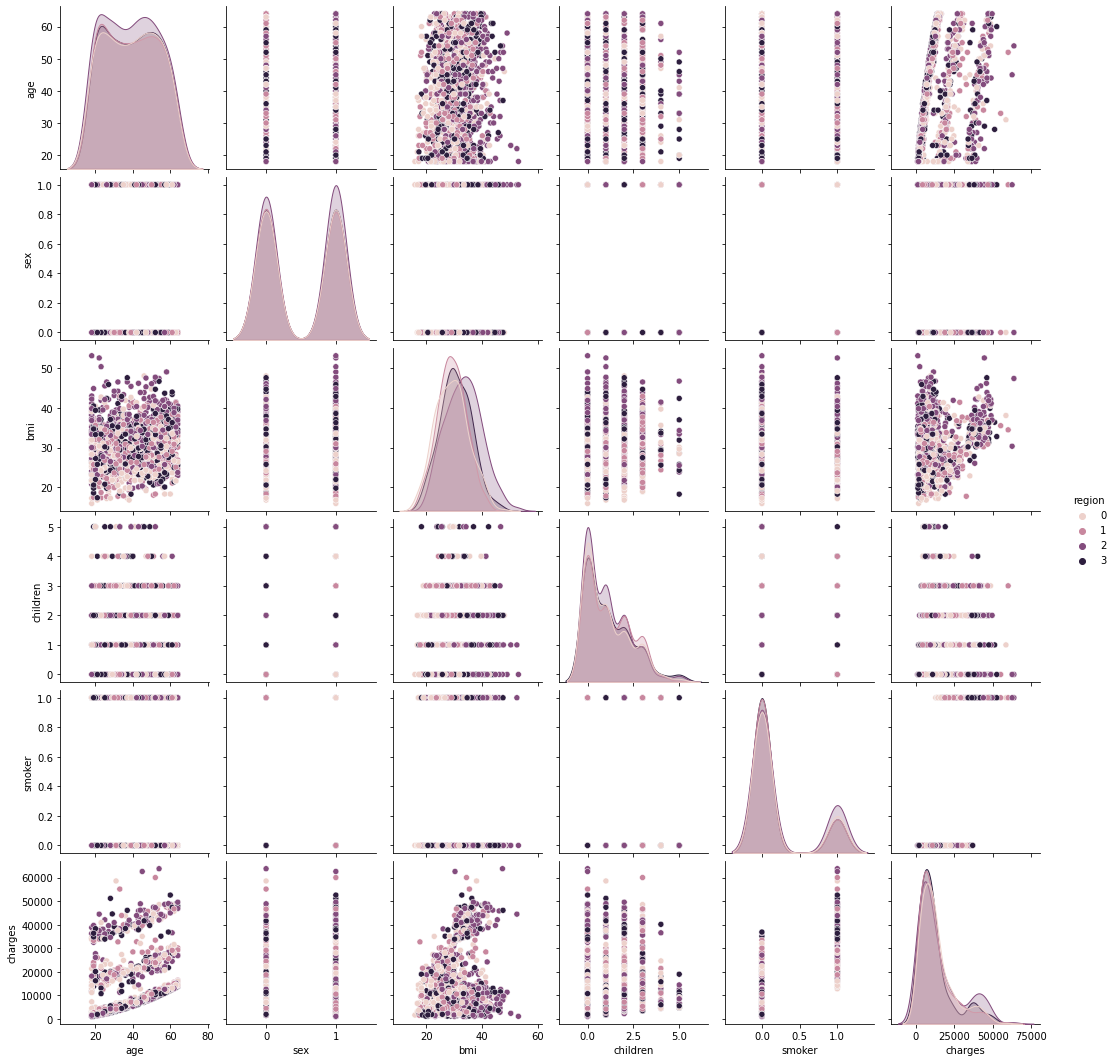

In [59]:
sns.pairplot(df, hue="region")

# almost equal region example of data set

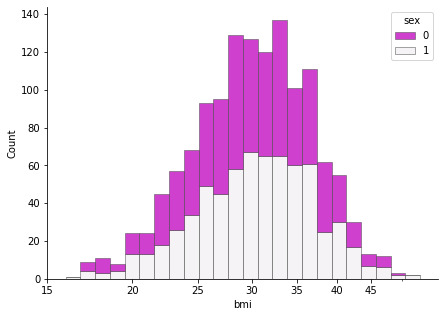

In [60]:
import matplotlib as mpl
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="bmi",hue="sex",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(range(15,50,5))
plt.show()

#  According to dataset the Female has high BMI 
male is living a heathy lifestyle

[Text(0, 0.5, 'count')]

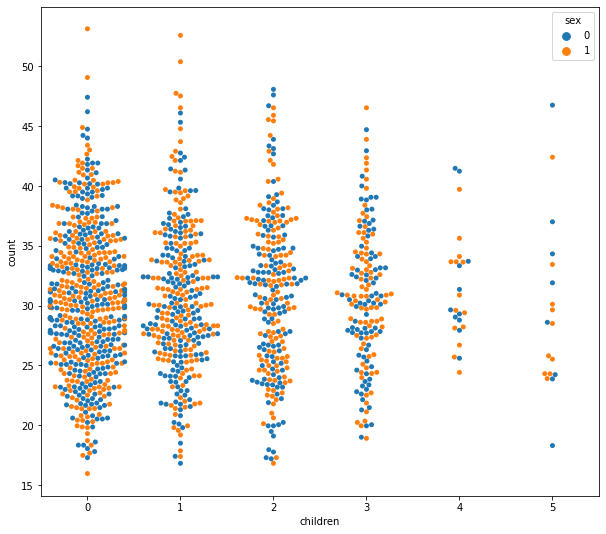

In [61]:
plt.figure(figsize=(10,9))
ax = sns.swarmplot(data=df, x="children", y="bmi", hue="sex")
ax.set(ylabel="count")

#  In this dataset most of not depended childern in health insurance when the no of children dependancy  increasing the  the people is decreasing

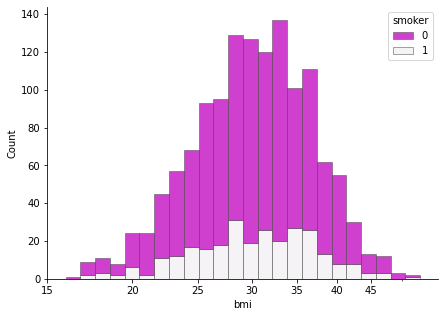

In [62]:
import matplotlib as mpl

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="bmi" ,hue="smoker",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(range(15,50,5))
plt.show()

# The smokers person high bmi as compared non smokers

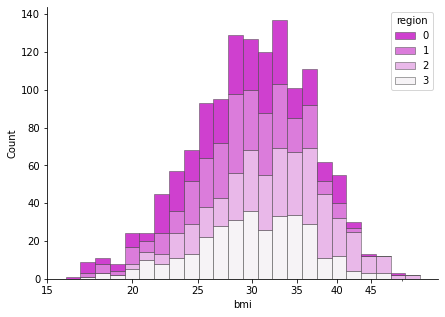

In [63]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="bmi",hue="region",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(range(15,50,5))
plt.show()

#  As compared to south region north region is living a healthy lifestyle

[Text(0, 0.5, 'count')]

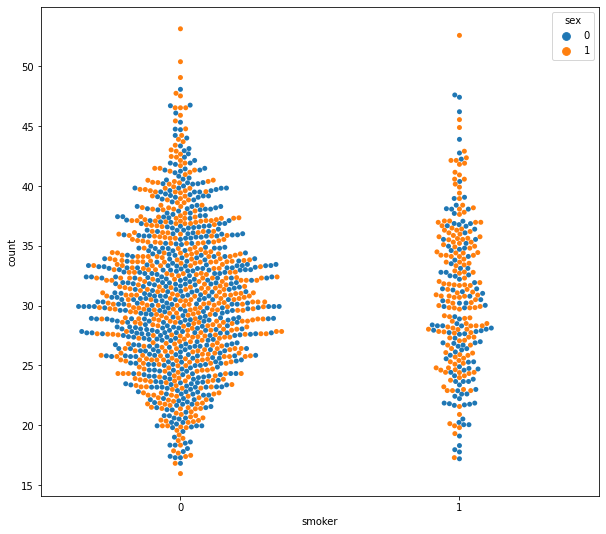

In [64]:
plt.figure(figsize=(10,9))
ax = sns.swarmplot(data=df, x="smoker", y="bmi", hue="sex")
ax.set(ylabel="count")

In [65]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [66]:
categorial_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorial_data.append(i)
numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_data.append(i)

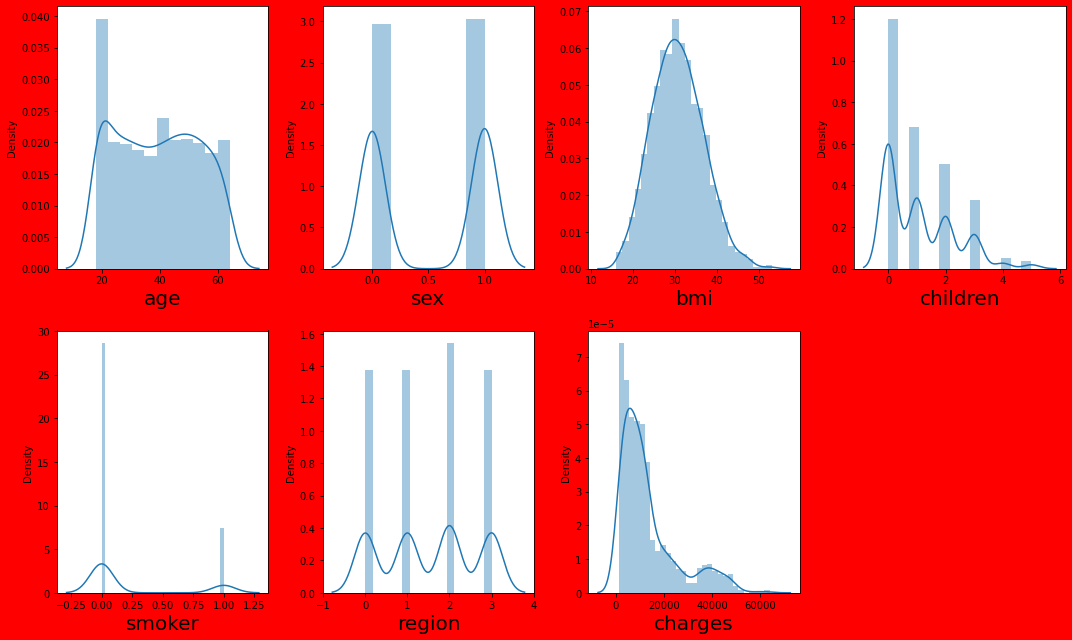

In [67]:
plt.figure(figsize=(15,9),facecolor='red')
plotnumber=1
for column in numerical_data:
    if plotnumber<=8:  # cuz we have total 8 rows
        ax=plt.subplot(2,4,plotnumber)  # 2 rows and 4 column
        sns.distplot(df[column])  # distrubution plot
        plt.xlabel (column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

# 
The age and bmi is almost is normali distrubuted 


 we ignore children column cause the column is categorical data

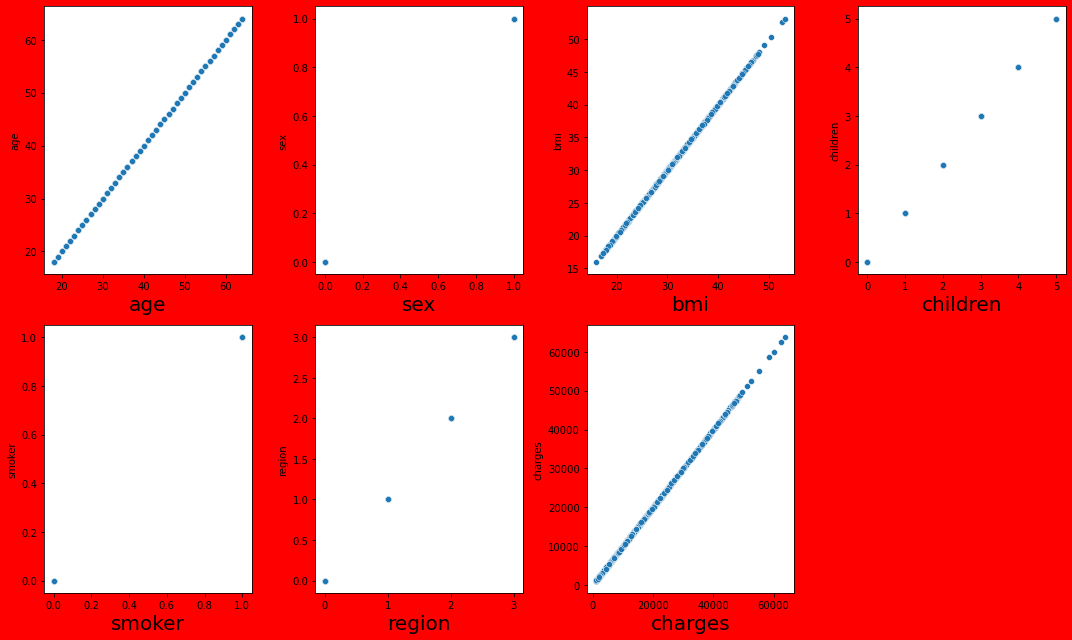

In [76]:
plt.figure(figsize=(15, 9), facecolor='red')
plotnumber = 1
for column in df.columns:
    if plotnumber <= 8:  # We have a total of 8 rows
        plt.subplot(2, 4, plotnumber)  # 2 rows and 4 columns
        ax = sns.scatterplot(data=df, x=column, y=df[column])  # Scatter plot
        plt.xlabel(column, fontsize=20)

    plotnumber += 1

plt.tight_layout()
plt.show()

#  All column is contribute to target variable

<AxesSubplot:>

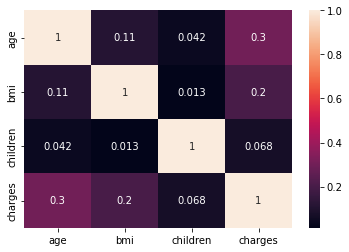

In [22]:
sns.heatmap(df.corr(), annot=True,fmt='.2g')

#  There is no corelation in this data

# Skewness 

In [23]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#  skewness value between -0.5 and +0.5 indicates a relatively symmetric distribution  
# children column is categorical so we ignore skewness and  
# charges column is target variable so we won't remove skewness

#  encoding process

In [24]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['sex', 'smoker', 'region']

label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#  Preprocessing done Now we can build a model

In [26]:
x= df.drop('charges',axis=1)
y=df['charges']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


# checking VIF Value

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns # if u not fill this code 
vif

,vif,features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


#  All the vif score is less than 5 (this is not standard but we take) if any fetures is more than 5 so we can drop this features but this project we are not droping any features

In [40]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

# 
 Finding the best random score 

In [77]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.8041576323426197 at random_state 112


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)



In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [98]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.8041576323426197
R2_score on training data:  72.53763959645671
MEAN ABSOLUTE ERROR : 3916.569265561582
MEAN SQUARED ERROR : 29880673.555641145
ROOT MEAN SQUARED ERROR : 5466.321757419805


In [99]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.9129543464204031
R2_score on training data:  89.20974656760883
MEAN ABSOLUTE ERROR : 2178.7043593855196
MEAN SQUARED ERROR : 13281001.40006322
ROOT MEAN SQUARED ERROR : 3644.310826488764


In [100]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.8983389822766995
R2_score on training data:  97.2553943537174
MEAN ABSOLUTE ERROR : 2212.281235317081
MEAN SQUARED ERROR : 15510942.398524033
ROOT MEAN SQUARED ERROR : 3938.3933778285827


In [101]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.8041576323426197
R2_score on training data:  99.86401505730052
MEAN ABSOLUTE ERROR : 3916.569265561582
MEAN SQUARED ERROR : 29880673.555641145
ROOT MEAN SQUARED ERROR : 5466.321757419805


In [102]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.8563501742148685
R2_score on training data:  85.85323135123244
MEAN ABSOLUTE ERROR : 3017.257427708955
MEAN SQUARED ERROR : 21917390.0007151
ROOT MEAN SQUARED ERROR : 4681.6012218807255


In [103]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.8041654365641747
R2_score on training data:  72.53763490441398
MEAN ABSOLUTE ERROR : 3916.4118419810015
MEAN SQUARED ERROR : 29879482.82556864
ROOT MEAN SQUARED ERROR : 5466.212841224593


In [104]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.8041577679370701
R2_score on training data:  85.85323135123244
MEAN ABSOLUTE ERROR : 3918.2178490667925
MEAN SQUARED ERROR : 29880652.867301058
ROOT MEAN SQUARED ERROR : 5466.319865073856


In [105]:
from sklearn.model_selection import cross_val_score

In [116]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
Difference between Accuracy score  and cross validation score is -  0.0569016849845243


In [107]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())*100

GradientBoostingRegressor 


[0.87512302 0.79196677 0.89420007 0.84919102 0.85973035]
0.8540422453538723
Difference between Accuracy score  and cross validation score is -  0.058912101066530775


In [108]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[0.85823587 0.77135206 0.86506075 0.8316678  0.85453488]
0.8361702733232512
Difference between Accuracy score  and cross validation score is -  0.06216870895344828


In [109]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[0.76003434 0.62720212 0.73644963 0.72767604 0.66175825]
0.7026240771441942
Difference between Accuracy score  and cross validation score is -  0.10556701748275177


In [110]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
Difference between Accuracy score  and cross validation score is -  0.05011787834163983


In [111]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
Difference between Accuracy score  and cross validation score is -  0.056904501626744985


In [112]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582403
Difference between Accuracy score  and cross validation score is -  0.05689691777882977


# 
KNN is the best fitted model as per R2 score and difference beetween accuracy score and validation score

In [118]:
from sklearn.model_selection import GridSearchCV

In [134]:
params= {'alpha':[1.0,.05,.4,2], 'fit_intercept' :[True, False], 
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'], 
       'positive': [False, True], 'random_state':[1,4,10,20]}

gdsv= GridSearchCV(Ridge(),params,cv=5)
gdsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [135]:
gdsv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'sag'}

In [141]:
Final_model = Ridge(alpha=2, fit_intercept=True, positive=False, random_state=1, solver='sag')
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

80.40513853765019


In [142]:
import joblib
joblib.dump(Final_model,'Medical Cost Personal Insurance Project.pkl')

['Medical Cost Personal Insurance Project.pkl']